In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

## Import Portfolio Classes

In [2]:
from vaa import VAA
from fixed_allocations import FixedAllocation

vaa = VAA()
spy = FixedAllocation('SPY',['SPY'],np.array([1]))
sf = FixedAllocation("60% Stocks & 40% Bonds",['BND', 'SPY'],np.array([0.4, 0.6]))
fs = FixedAllocation("Four Seasons",['VTI', 'TLT', 'IEF', 'GLD', 'DBC'],np.array([0.3, 0.4, 0.15, 0.075, 0.075]))
aw = FixedAllocation("All Weather",['VT', 'LTPZ', 'EDV', 'VCLT', 'EMLC', 'IAU', 'BCI'],np.array([0.35, 0.2, 0.2, 0.075, 0.075, 0.05, 0.05]))
pm = FixedAllocation("Permanent",['VTI', 'IEF', 'TLT', 'GLD'],np.array([0.25, 0.25, 0.25, 0.25]))

portfolios = [vaa, spy, sf, fs, aw, pm]

                 SPY       VEA       VWO       AGG
2008-10-31 -3.844168 -5.008244 -6.550553 -0.663047
2008-12-31 -2.991668 -2.729982 -4.164719  1.254895
2009-03-31 -4.018737 -4.901103 -2.960050 -0.211027
2009-04-30 -0.242365 -0.188566  1.182026  0.278041
2009-06-30 -0.223514  0.452950  2.237257  0.025863
...              ...       ...       ...       ...
2021-08-31  2.316504  1.284503  0.213343  0.132735
2021-09-30  0.553184  0.293806 -0.140649 -0.180608
2021-11-30  2.000985  0.169359 -0.250607 -0.103463
2021-12-31  1.655369  0.617354  0.002884 -0.170930
2022-01-31  0.094886 -0.400858  0.053651 -0.457275

[111 rows x 4 columns]
                 SHY       IEF       LQD
2008-10-31  0.200288 -0.148535 -1.330080
2008-12-31  0.197696  2.234347  1.826831
2009-03-31  0.047729  0.416708 -1.032264
2009-04-30 -0.001034  0.098686  0.455086
2009-06-30 -0.057133 -0.608604  0.390224
...              ...       ...       ...
2021-08-31  0.019799  0.275846  0.286305
2021-09-30 -0.031957 -0.293966 -0.14

## CAGR and MDD Comparison

In [3]:
strategies = {}

for p in portfolios:
    strategies[str(p)] = {}
    strategies[str(p)]['CAGR'] = p.cagr()
    strategies[str(p)]['MDD'] = p.mdd()
    strategies[str(p)]['CAGR/MDD'] = p.cagr() / -p.mdd()

summary = pd.DataFrame(strategies)
summary.transpose()

,CAGR,MDD,CAGR/MDD
VAA,0.085121,-0.087845,0.968994
SPY,0.121619,-0.485807,0.250343
60% Stocks & 40% Bonds,0.073665,-0.319047,0.230892
Four Seasons,0.076515,-0.135792,0.563474
All Weather,0.081684,-0.107827,0.757545
Permanent,0.082984,-0.147842,0.561305


## Cummulative Returns of Portfolios

In [4]:
cummulative_returns = {}

for p in portfolios:
    cummulative_returns[str(p)] = p.port_cum_returns

In [5]:
cum_returns_df = pd.DataFrame(cummulative_returns)
cum_returns_df.dropna(inplace=True)

for port in cum_returns_df.columns:
    cum_returns_df[port] = cum_returns_df[port] / cum_returns_df.loc[cum_returns_df.index[0],port]

In [6]:
type(cum_returns_df.index[0])
cum_returns_df.index = pd.to_datetime(cum_returns_df.index)
type(cum_returns_df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

## SPY Performance Summary

## 60% Stocks + 40% Bond

[*********************100%***********************]  2 of 2 completed


array([<AxesSubplot:title={'center':'Copyright (c) 2020-2022, Dany Cajas. All rights reserved.'}>,
       <AxesSubplot:title={'center':'Historical Compounded Cumulative Returns'}>,
       <AxesSubplot:title={'center':'Portfolio Composition'}>,
       <AxesSubplot:title={'center':'Risk (Standard Deviation) Contribution per Asset'}>,
       <AxesSubplot:title={'center':'Portfolio Returns Histogram'}, ylabel='Probability Density'>,
       <AxesSubplot:title={'center':'Historical Uncompounded Drawdown'}>],
      dtype=object)

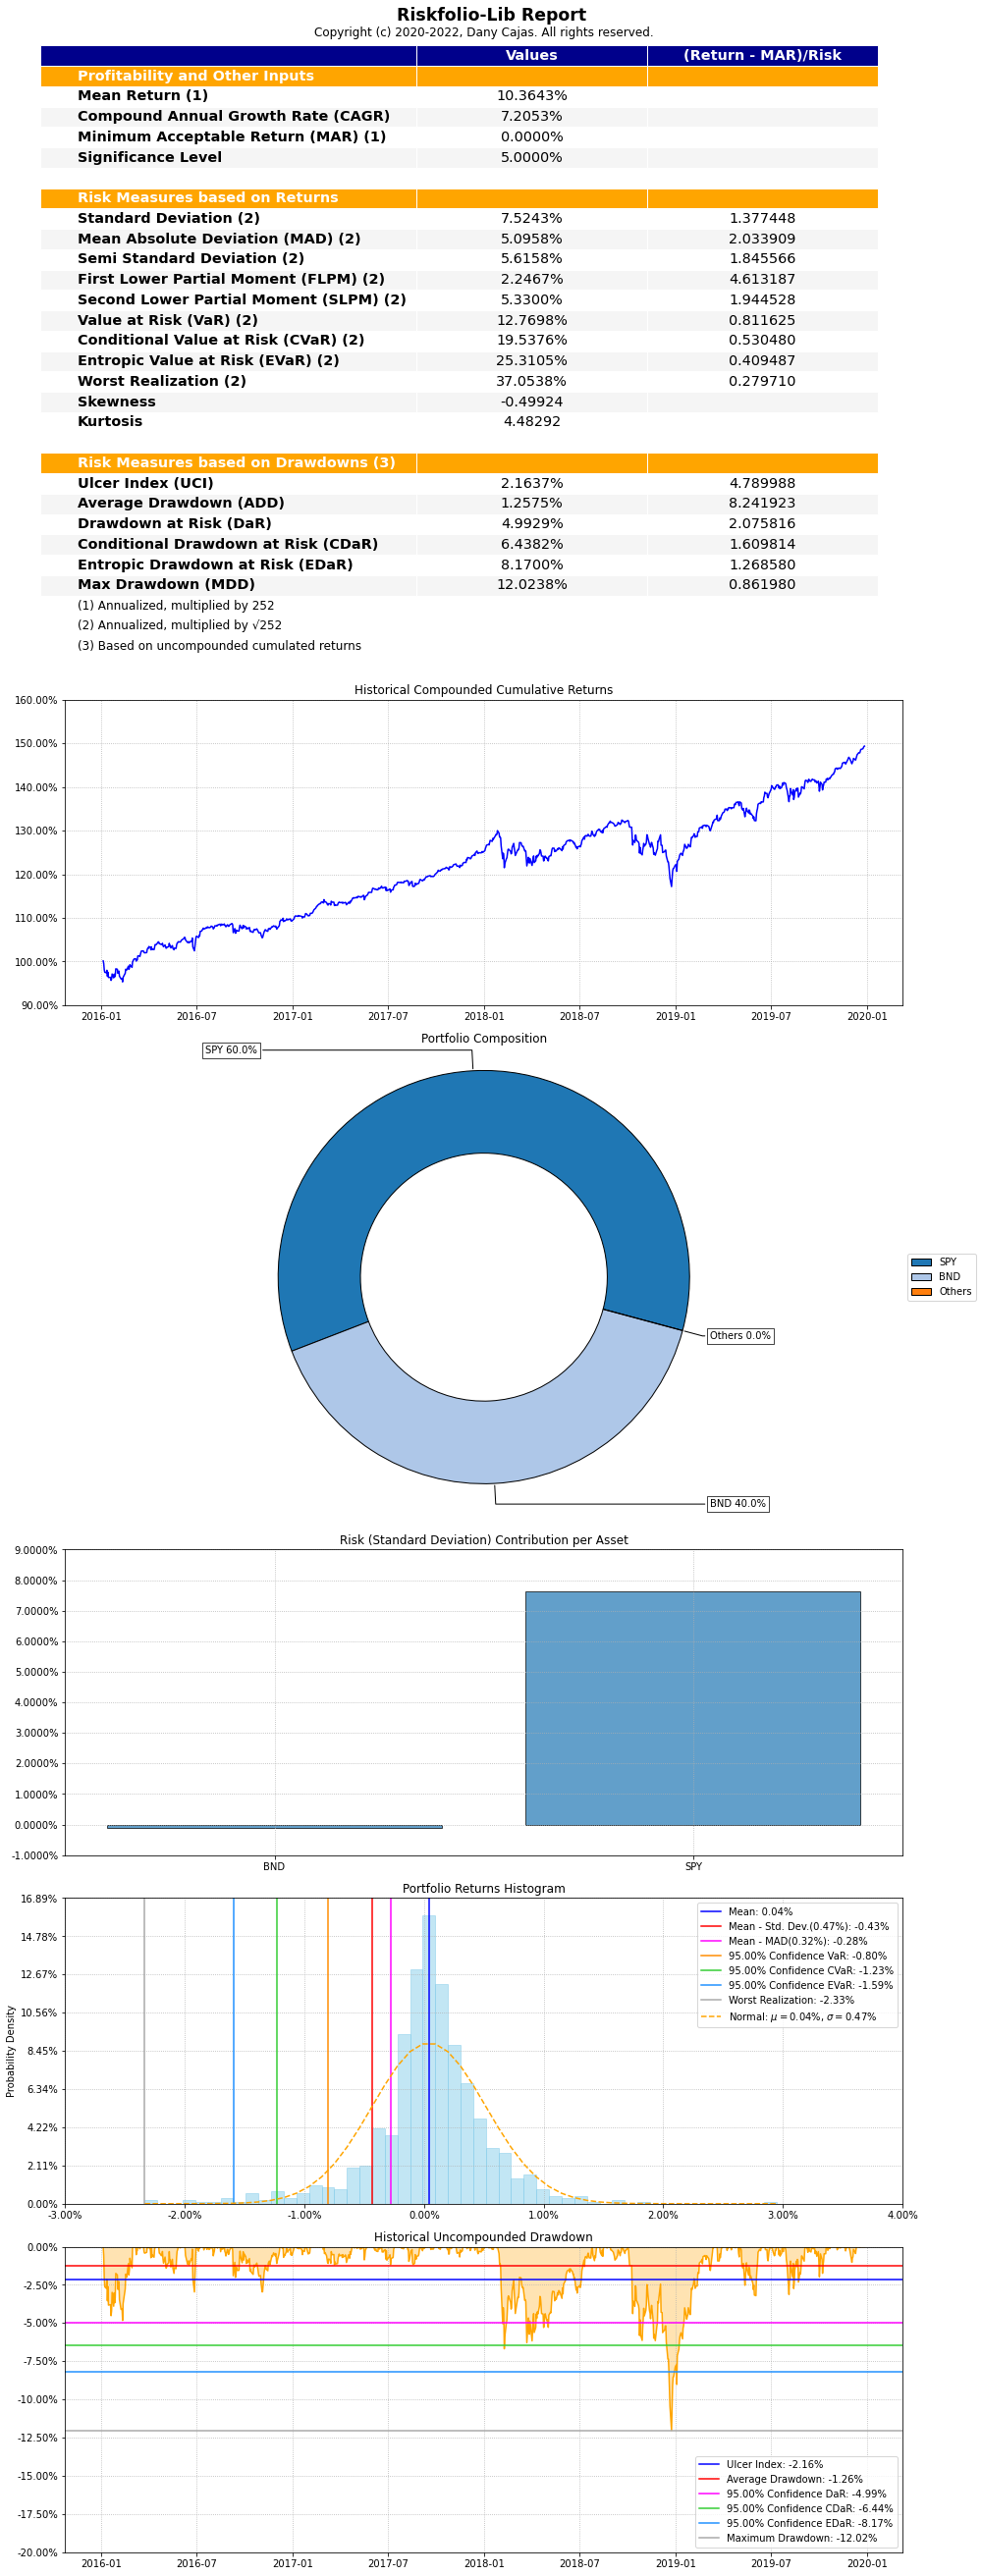

In [7]:
sf.report()

## Four Seasons

[*********************100%***********************]  5 of 5 completed


array([<AxesSubplot:title={'center':'Copyright (c) 2020-2022, Dany Cajas. All rights reserved.'}>,
       <AxesSubplot:title={'center':'Historical Compounded Cumulative Returns'}>,
       <AxesSubplot:title={'center':'Portfolio Composition'}>,
       <AxesSubplot:title={'center':'Risk (Standard Deviation) Contribution per Asset'}>,
       <AxesSubplot:title={'center':'Portfolio Returns Histogram'}, ylabel='Probability Density'>,
       <AxesSubplot:title={'center':'Historical Uncompounded Drawdown'}>],
      dtype=object)

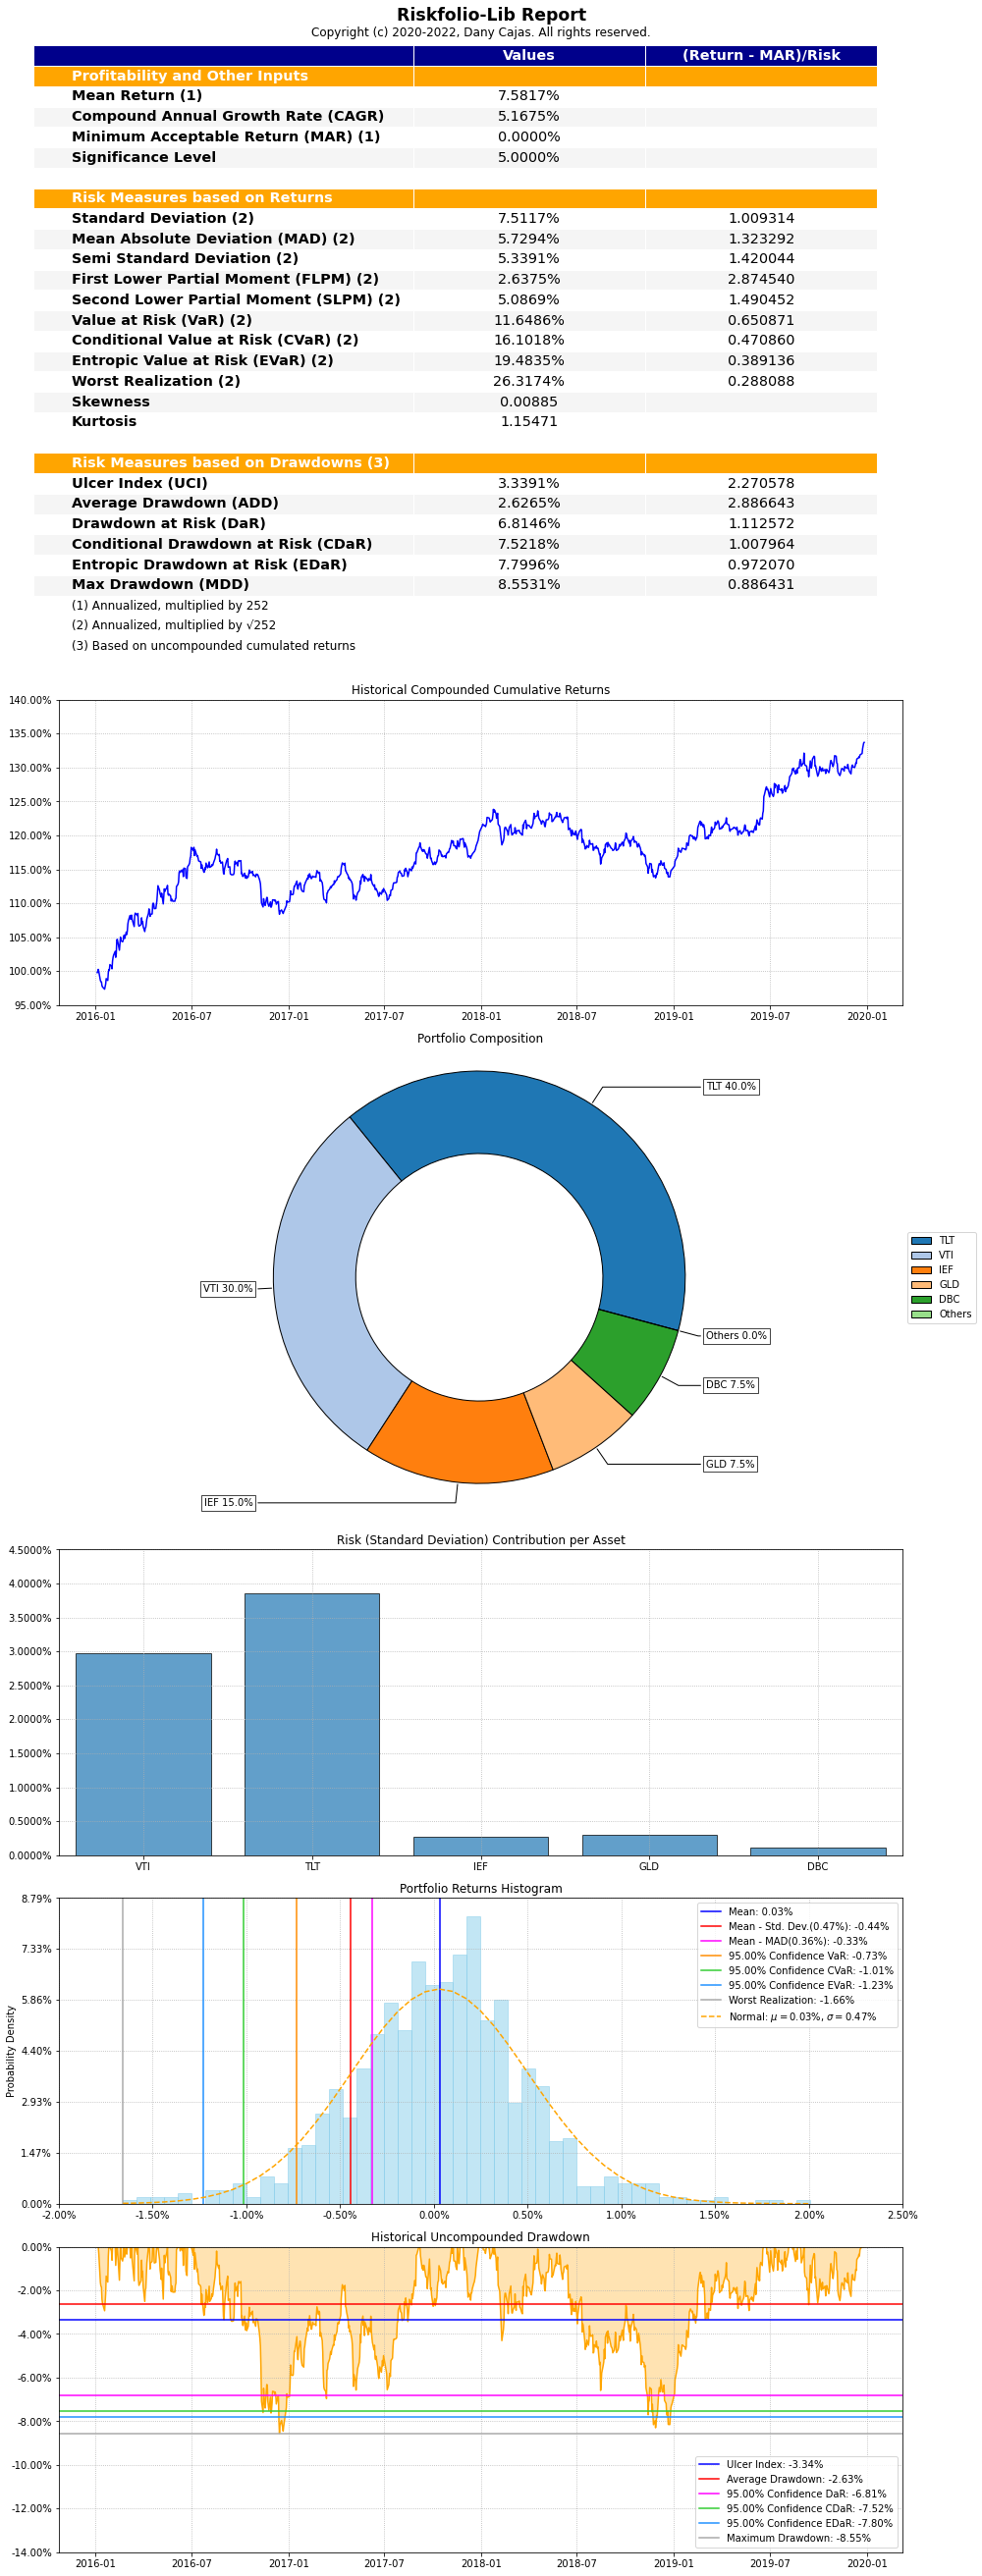

In [8]:
fs.report()

## Performance Visualization

Text(0.5, 1.0, 'Historical Cummulative Returns of Portfolios')

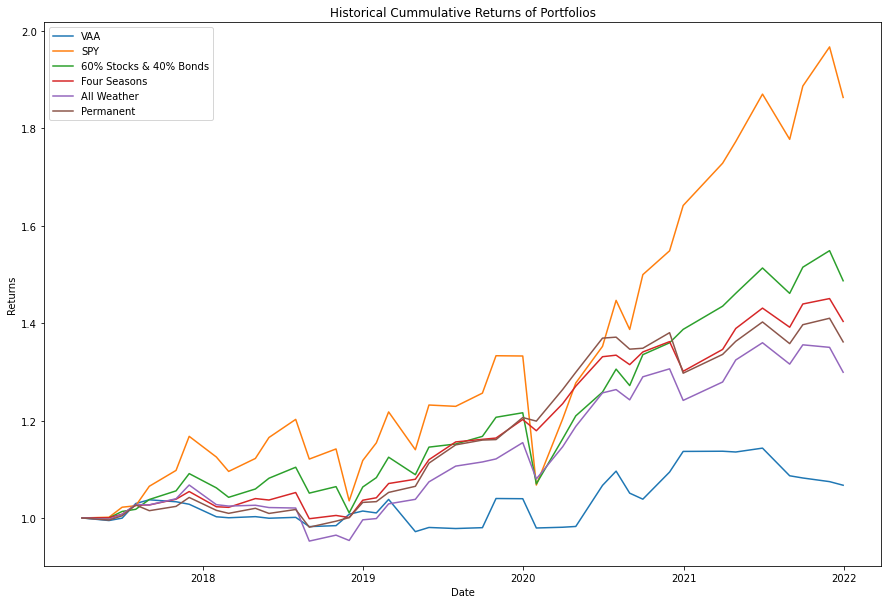

In [9]:
### Backtesting Performance Comparison (All Portfolios)
plt.figure(figsize=(15,10))
plt.plot(cum_returns_df)
plt.legend(cum_returns_df.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Historical Cummulative Returns of Portfolios')
### Backtesting Performance Comparison (Original VAA, 60/40, SPY)
# sub_df = combined_df[['VAA/Original', '60/40', 'SPY']]
# plt.figure(figsize=(15,10))
# plt.plot(sub_df)
# plt.legend(sub_df.columns)
# plt.xlabel('Date')
# plt.ylabel('Returns')
# plt.title('Portfolio Performance Comparison')